In [275]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**EDA**

In [276]:
df = pd.read_csv(r"C:\Users\axelb\Desktop\ml-zoomcamp\dataset_hmw2.csv")

In [277]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

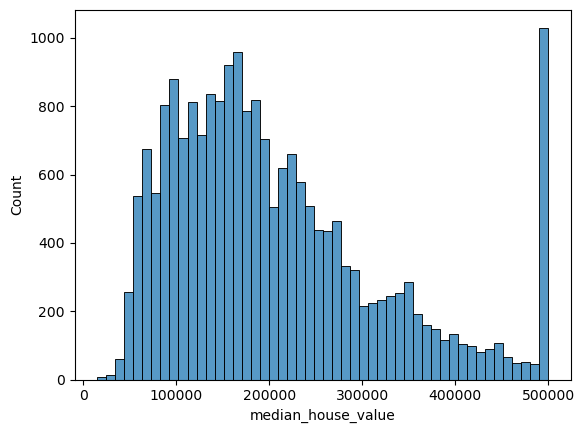

In [278]:
sns.histplot(df.median_house_value, bins=50)

==> no it is not a long tail distribution, it is more of a normal distribution

**preparing the dataset**

In [279]:
dataset = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [280]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [281]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
        'population', 'households', 'median_income', 'median_house_value']

In [282]:
dataset = dataset[base]
dataset

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


**question 1**

In [283]:
dataset.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

==> total_bedrooms is the feature with missing values

**question 2**
median for the variable 'population'

In [284]:
population_median = np.median(dataset.population.values)
population_median

1195.0

**prepare and split the dataset**

In [285]:
n = len(dataset)
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [286]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n_train, n_val, n_test

(9413, 3137, 3137)

In [287]:
df_train = dataset.iloc[idx[:n_train]]
df_val = dataset.iloc[idx[n_train:n_train+n_val]]
df_test = dataset.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [288]:
df_train['median_house_value'] = np.log1p(df_train.median_house_value)
df_val['median_house_value'] = np.log1p(df_val.median_house_value)
df_test['median_house_value'] = np.log1p(df_test.median_house_value)

In [289]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

y_train, y_val, y_test

(array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
        12.11888489, 12.52924613]),
 array([11.3095968 , 12.27326857, 11.95247633, ..., 12.53968723,
        12.34279083, 11.97477721]),
 array([11.90969286, 12.16733701, 12.39338589, ..., 12.3647886 ,
        11.33141558, 12.50766132]))

**question 3**

In [290]:
total_bedrooms_avg = np.mean(df_train.total_bedrooms)
total_bedrooms_avg

542.552956325786

In [291]:
# we want to predict the median_house_vale, so we need to redefine our feature vector

features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
        'population', 'households', 'median_income']

len(features)

8

In [292]:
def prepare_X_zero(df):

    df_new = df[features]
    df_new = df_new.fillna(0)
    X = df_new.values

    return X



def prepare_X_mean(df):
    
    df_new = df[features]
    df_new = df_new.fillna(total_bedrooms_avg)
    X = df_new.values

    return X



def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]



def rmse(y, y_pred):

    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)

(9413, 8)
(3137, 8)


C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: ylabel='Count'>

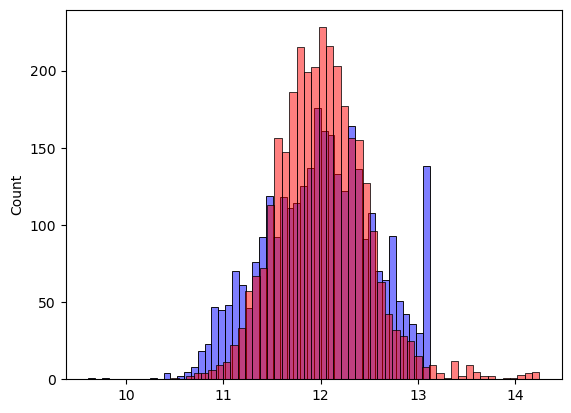

In [293]:
# linear regression with fillna(0)

X_train = prepare_X_zero(df_train)
print(X_train.shape)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_zero(df_val)
print(X_val.shape)
y_pred = w0 + X_val.dot(w)
score_zero = rmse(y_val, y_pred)

sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)

C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\axelb\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: ylabel='Count'>

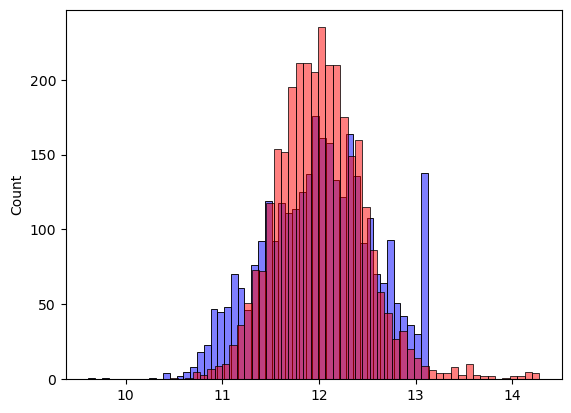

In [294]:
# linear regression with fillna(mean)

X_train1 = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train1, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
score_mean = rmse(y_val, y_pred)

sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)

In [295]:
score_zero, score_mean

(0.3408479034178568, 0.3405699801421053)

In [296]:
round(score_zero, 2)

0.34

In [297]:
round(score_mean, 2)

0.34

**question 4**

In [299]:
def train_linear_regression_r(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [303]:
X_train = prepare_X_zero(df_train)
X_val = prepare_X_zero(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    w0, w_full = train_linear_regression_r(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w_full)
    score = rmse(y_val, y_pred)

    print("r=%f" % r, w0, round(score, 2))

r=0.000000 -9.763249477337387 0.34
r=0.000001 -9.763228830643307 0.34
r=0.000100 -9.761185235453269 0.34
r=0.001000 -9.742646249363403 0.34
r=0.010000 -9.561056192740143 0.34
r=0.100000 -8.058889769357727 0.34
r=1.000000 -3.13315427840502 0.34
r=5.000000 -0.8410867974437348 0.35
r=10.000000 -0.4381172315623696 0.35


**question 5**

In [304]:
scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    # shuffling
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    # spliting the dataset
    df_train = dataset.iloc[idx[:n_train]]
    df_val = dataset.iloc[idx[n_train:n_train+n_val]]
    df_test = dataset.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    df_train['median_house_value'] = np.log1p(df_train.median_house_value)
    df_val['median_house_value'] = np.log1p(df_val.median_house_value)
    df_test['median_house_value'] = np.log1p(df_test.median_house_value)

    # preparing for training & validation
    X_train = prepare_X_zero(df_train)
    X_val = prepare_X_zero(df_val)
    
    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values

    # training 
    w0, w_full = train_linear_regression(X_train, y_train)

    # validation
    y_pred = w0 + X_val.dot(w_full)
    score = rmse(y_val, y_pred)

    scores.append(score)
    

In [305]:
std = np.std(scores)
round(std, 3)

0.005

**question 6**

In [306]:
# shuffling
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# spliting the dataset
df_train = dataset.iloc[idx[:n_train]]
df_val = dataset.iloc[idx[n_train:n_train+n_val]]
df_test = dataset.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train['median_house_value'] = np.log1p(df_train.median_house_value)
df_val['median_house_value'] = np.log1p(df_val.median_house_value)
df_test['median_house_value'] = np.log1p(df_test.median_house_value)

# preparing for training & validation
df_full = pd.concat([df_train, df_val])
df_full = df_full.reset_index(drop=True)

X_full = prepare_X_zero(df_full)
X_test = prepare_X_zero(df_test)
    
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

y_full = np.concatenate([y_train, y_val])

# training
r = 0.001
w0, w_full = train_linear_regression_r(X_full, y_full, r)

# validation
y_pred = w0 + X_test.dot(w_full)
score = rmse(y_test, y_pred)
round(score, 3)

0.335